## Problema

Aproximar a função $f(x) = t^2$ por séries de Fourier dentro do intervalo $[0:2\pi]$.

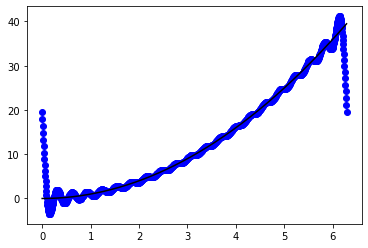

In [168]:
import numpy as np

def f_principal (x):
    return x * x

def my_f (t, a0, ak, bk, N):
               
    # verifica se 't' é um número ou vetor
    if np.ndim(t) == 0:
        # é número
        soma = 0.0
   
        for k in range(N):
            tmp = (k+1)*t
            soma = ak * np.cos(tmp) + bk * sin(tmp)
            
        soma = soma + a0/2

    else:
        # é vetor
        soma = np.zeros (t.shape)
    
        for k in range(N):
            tmp = (k+1) * t
            soma = soma + np.full (t.shape, ak[k] * np.cos(tmp)) + np.full (t.shape, bk[k] * np.sin(tmp))
            
        soma = soma + np.full (t.shape, a0 / 2)

    return soma

def serie_Fourier (f_original, N, x0, xf, n):
    import scipy.integrate as integrate
    
    # a0
    a0 = integrate.quad (f_original, x0, xf)[0] / np.pi
    
    # senos e cosenos
    ak = np.zeros(N)
    bk = np.zeros(N)
    
    for k in range(N):
        ak[k] = integrate.quad (lambda x:f_original(x)*np.cos((k+1)*x), x0, xf)[0] / np.pi
        bk[k] = integrate.quad (lambda x:f_original(x)*np.sin((k+1)*x), x0, xf)[0] / np.pi 
        
    # encontrando x
    x = np.linspace(x0, xf, n) 
    # encontrando y
    y = my_f (x, a0, ak, bk, N)
    return x, y
    

# argumentos 
# 1: função a ser aproximada
# 2: ordem da aproximação
# 3: x inicial
# 4: x final
# 5: número de pontos do intervalo a considerar
x,y = serie_Fourier (f_principal, 20, 0, 2*np.pi, 1000)


xf = np.linspace(0,2*np.pi,1000)
yf = f_principal(xf)

import matplotlib.pyplot as plt
plt.plot (x, y,'bo', xf, yf, 'k')